# # 1. Pick a dataset: I chose tthe 2017 Stack Overflow results in my project.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('data/survey_results_public.csv')
schema = pd.read_csv('data/survey_results_schema.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

# # 2. Pose at least three questions related to business or real-world applications of how the data could be used.

1.The most frequent languages, technologies, methodologies and technologies used by professionals

2.Average salary for each programming language

3.Which programming language has the highest job satisfaction


# # 3. Create a Jupyter Notebook, using any associated packages you'd like, to:
3-A Prepare data

3-B Analyze 
 
3-C Model 
 
3-D Visualize 

In [5]:
q1 = df[['Professional', 'HaveWorkedLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase', 'Methodology']]
q1 = q1[q1.Professional == "Professional developer"]
q1.head()

KeyError: "None of [Index(['Professional', 'HaveWorkedLanguage', 'HaveWorkedFramework',\n       'HaveWorkedDatabase', 'Methodology'],\n      dtype='object')] are in the [columns]"

In [4]:
# 1.The most frequent languages, technologies, methodologies and technologies used by professionals
# 1.A: The most commonly used languages
languages = q1['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
languages.plot(kind="bar")
plt.savefig('languages')


NameError: name 'q1' is not defined

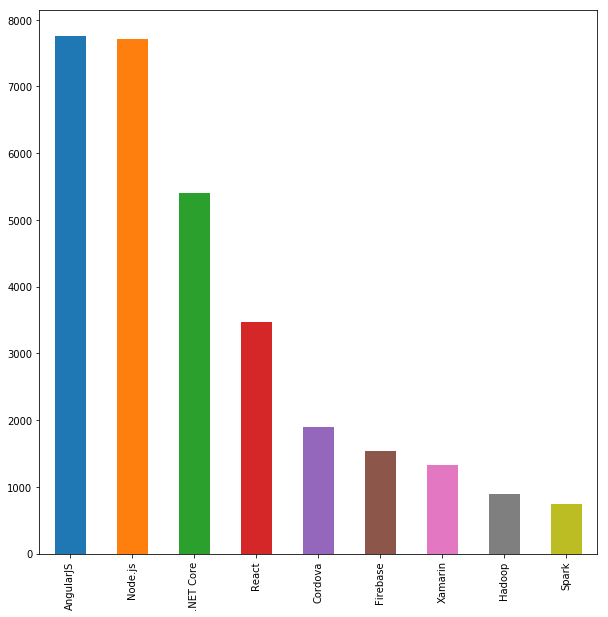

In [5]:
# 1.B: The most commonly used frameworks
frameworks = q1['HaveWorkedFramework'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
frameworks.plot(kind="bar")
plt.savefig('frameworks')

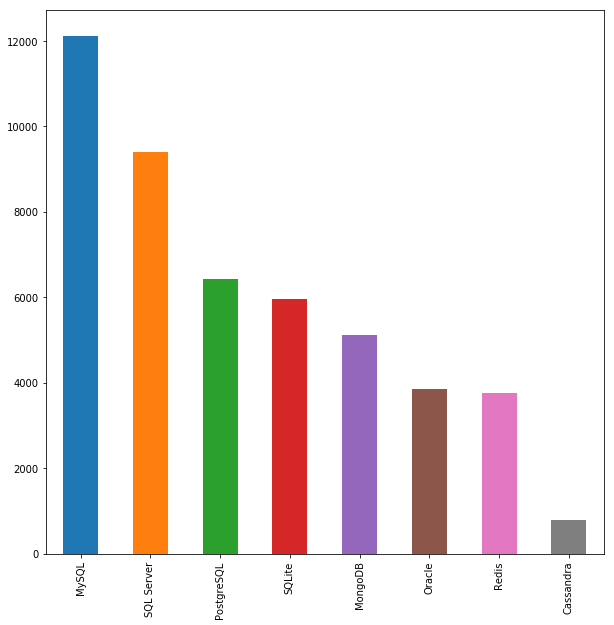

In [6]:
# 1.C: The most commonly used databases
databases = q1['HaveWorkedDatabase'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
databases.plot(kind="bar")
plt.savefig('databses')


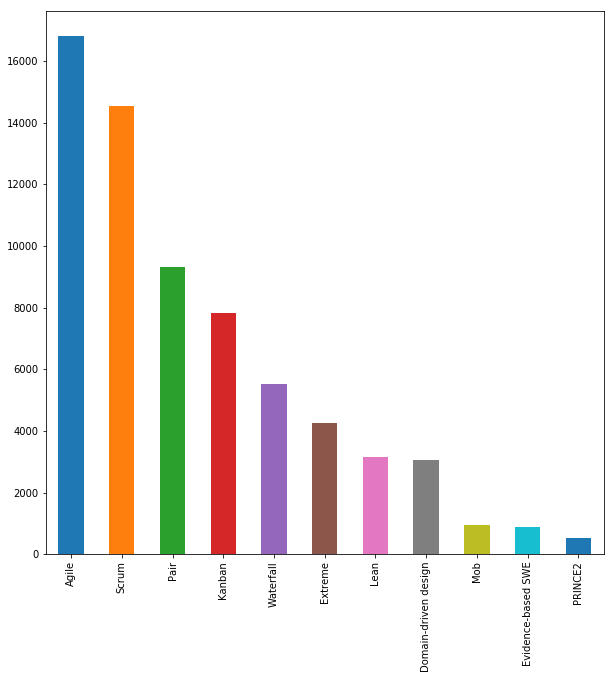

In [7]:
# 1.D: The most commonly used methodologies
methodologies = q1['Methodology'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
methodologies.plot(kind="bar")
plt.savefig('methodologies')

# # Evaluatation:
1.A: JavaScript, C#, Java and SQL and Python are the most 5 used languages by professional developers.
 
2.B: From the most used frameworks you can see that most of them is JavaScript based; as AngularJS, Node.js and React.
 
3.C: MySQL and SQL server are the most commonly used databases
 
4.D: Agile is the most popular methodology used by professional developers.


# 2.Average salary for each programming language
The data will be prepared here by selecting the desired columns and only using the rows where a professional devloper was taking the survey. All rows were dropped where the Professional column did not equal "Professional Developer" as I was only interested in Professional Developers.If the row had Salary or HaveWorkedLanguage as Nan then the row would be dropped. This is becase I was trying to find a correlation between the two and therefore they needed to exist.  This was the only way in which I needed to handle Nan values and categorical values.


In [8]:

q2 = df[['Professional', 'HaveWorkedLanguage', 'Salary']]
q2 = q2[q2.Professional == "Professional developer"]
q2 = q2.drop('Professional', 1)
q2 = q2.dropna(subset=['Salary', 'HaveWorkedLanguage'], axis=0)
q2.head()


,HaveWorkedLanguage,Salary
2,Java; PHP; Python,113750.0
14,Assembly; C; C++,100000.0
17,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.0
22,Java,100764.0
25,Java; Scala,175000.0


In [9]:

def split_column(column_to_split, delimeter, column_to_store, df):
    """
    Method to split a columns values by a provided delimeter while
    retaining the associated value of another column.
    
    :param str column_to_split: column whose values are to be split
    :param str delimeter: delimeter to split by
    :param str columns_to_store: column who's data must be stored along split rows
    :param DataFrame df: dataframe to use
    """
    split_col = pd.DataFrame(columns = [column_to_split, column_to_store])
    for index, row in df.iterrows():
        columns = row[column_to_split].split(delimeter)
        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_to_store]]
    return split_col


In [10]:

split_languages = split_column("HaveWorkedLanguage", "; ", "Salary", q2)
split_languages.head()


,HaveWorkedLanguage,Salary
0,Java,113750.0
1,PHP,113750.0
2,Python,113750.0
3,Assembly,100000.0
4,C,100000.0


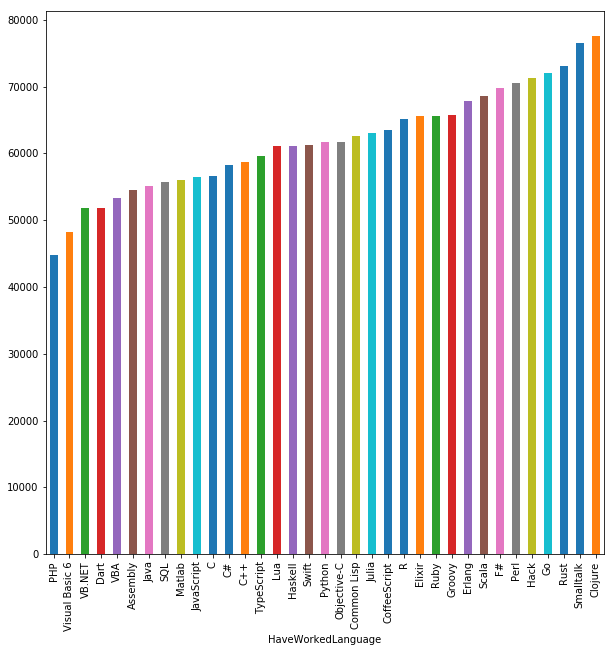

In [11]:
q2_answer = split_languages.groupby(['HaveWorkedLanguage']).mean()['Salary'].sort_values()
plt.figure(figsize=(10,10))
q2_answer.plot(kind = 'bar')
plt.savefig('q2')

# Evaluatation:
1.From the chart the average salaries range is between ~40K to ~80K. 
 
2.Most popular languages as JavaScript, C#, Java, SQL and Python we found in the first question seem to be in the middle of the range, and that's expected! because the more people who knows that language mean less rareness.

3. At the same time, if the language is less popular like Hack it will be from the highest salaries range. 


# 3.Which programming language has the highest job satisfaction
The data will be prepared here by selecting the desired columns and only using the rows where a professional devloper was taking the survey All rows were dropped where the Professional column did not equal "Professional Developer" as I was only interested in Professional Developers.If the row had JobSatisfaction or HaveWorkedLanguage as Nan then the row would be dropped. This is becase I was trying to find a correlation between the two and therefore they needed to exist. This was the only way in which I needed to handle Nan values and categorical values.


In [12]:
q3 = df[['Professional', 'HaveWorkedLanguage', 'JobSatisfaction']]
q3 = q3[q3.Professional == "Professional developer"]
q3 = q3.drop('Professional', 1)
q3 = q3.dropna(subset=['JobSatisfaction', 'HaveWorkedLanguage'], axis=0)
q3.head()

,HaveWorkedLanguage,JobSatisfaction
2,Java; PHP; Python,9.0
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,7.0
8,C#; JavaScript,6.0
9,Objective-C; Swift,8.0
13,Java; JavaScript; Ruby; SQL,6.0


In [13]:
split_languages_q3 = split_column("HaveWorkedLanguage", "; ", "JobSatisfaction", q3)
q3_answer = split_languages_q3.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values()
q3_answer.head(50)

HaveWorkedLanguage
Visual Basic 6    6.899110
VB.NET            6.901878
Common Lisp       6.907143
Haskell           6.918768
Hack              6.969231
Java              6.984875
Matlab            6.988204
SQL               7.000276
Rust              7.003745
Julia             7.015152
C#                7.019202
PHP               7.023412
F#                7.030641
C                 7.037010
R                 7.043317
Dart              7.048544
Clojure           7.049020
JavaScript        7.062319
VBA               7.063559
C++               7.072574
Assembly          7.083074
Erlang            7.086538
Groovy            7.102786
Perl              7.104779
Python            7.114650
Lua               7.159933
Go                7.164094
Scala             7.192627
Ruby              7.216344
Swift             7.217698
TypeScript        7.229228
CoffeeScript      7.251020
Elixir            7.307190
Objective-C       7.317123
Smalltalk         7.461864
Name: JobSatisfaction, dtype: float6

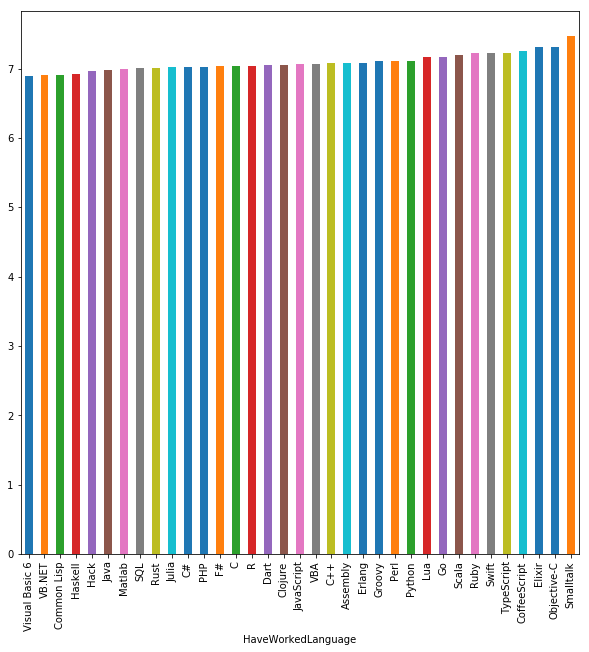

In [14]:
plt.figure(figsize=(10,10))
q3_answer.plot(kind = 'bar')
plt.savefig('q3')

# Evaluatation:
If we take the highest job satisfaction "Smalltalk" and the lowest "Visual Basic 6", and compare them with the average salaries chart at the second question, then we will find that "Smalltalk" came in the 2nd place as the highest average salaries, and "Visual Basic 6" is the 2nd lowest; and thats give us the effect of the salaries range on job satisfaction. 
